<a href="https://colab.research.google.com/github/mariliafcborba/HotelBooking/blob/main/Hotel_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação de bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Leitura do dataset

In [2]:
df = pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64542 entries, 0 to 64541
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           64542 non-null  object 
 1   is_canceled                     64542 non-null  int64  
 2   lead_time                       64542 non-null  int64  
 3   arrival_date_year               64542 non-null  int64  
 4   arrival_date_month              64542 non-null  object 
 5   arrival_date_week_number        64542 non-null  int64  
 6   arrival_date_day_of_month       64542 non-null  int64  
 7   stays_in_weekend_nights         64542 non-null  int64  
 8   stays_in_week_nights            64542 non-null  int64  
 9   adults                          64542 non-null  int64  
 10  children                        64538 non-null  float64
 11  babies                          64542 non-null  int64  
 12  meal                            

In [4]:
df.shape

(64542, 36)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

#Verificando se há valores nulos / dados ausentes

In [6]:
# Verificando se há valores nulos
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [7]:
# Verificando a quantidade de valores nulos no dataset
df.isnull().sum().sort_values(ascending=False)

company                           60881
agent                              9871
country                             482
children                              4
credit_card                           1
phone-number                          1
email                                 1
name                                  1
reservation_status_date               1
reservation_status                    1
booking_changes                       0
deposit_type                          0
adr                                   0
days_in_waiting_list                  0
customer_type                         0
reserved_room_type                    0
required_car_parking_spaces           0
total_of_special_requests             0
assigned_room_type                    0
hotel                                 0
is_canceled                           0
previous_cancellations                0
is_repeated_guest                     0
distribution_channel                  0
market_segment                        0


#Tratamento dos dados ausentes

In [8]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [9]:
df.dropna(axis=0, inplace=True, subset=['children'])

In [10]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [11]:
df.dropna(axis=0, inplace=True, subset=['country'])

In [12]:
df['agent'].replace(np.nan, 'No agent', inplace=True)

In [13]:
df['company'].replace(np.nan, 'No company', inplace=True)

In [14]:
df.isnull().sum().sort_values(ascending=False)

credit_card                       1
phone-number                      1
email                             1
name                              1
reservation_status_date           1
reservation_status                1
company                           0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
adr                               0
days_in_waiting_list              0
customer_type                     0
is_canceled                       0
required_car_parking_spaces       0
total_of_special_requests         0
reserved_room_type                0
hotel                             0
previous_cancellations            0
stays_in_week_nights              0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
adults                      

#Análise exploratória dos dados

In [15]:
# Número de reservas por hotel
df['hotel'].value_counts()

Resort Hotel    39596
City Hotel      24460
Name: hotel, dtype: int64

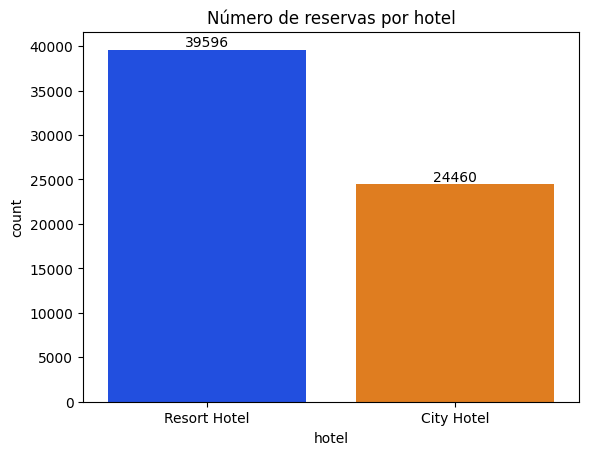

In [16]:
# Visualização de número de reservas por hotel
ax = sns.countplot(data=df, x='hotel', palette='bright')
plt.title("Número de reservas por hotel")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [17]:
# Quantidade de reservas por ano
df['arrival_date_year'].value_counts()

2016    33939
2017    15578
2015    14539
Name: arrival_date_year, dtype: int64

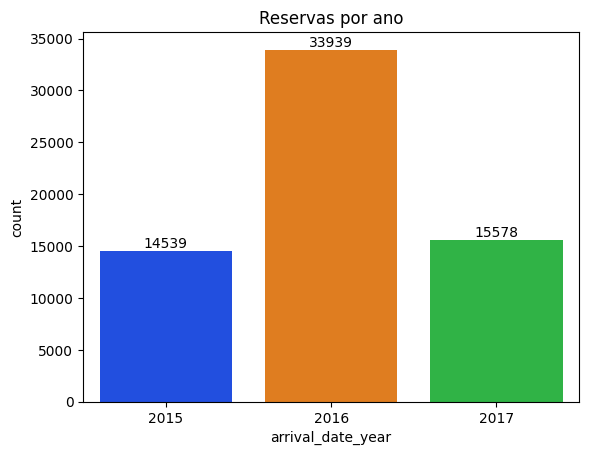

In [18]:
# Visualização de reservas por ano
ax = sns.countplot(data=df, x='arrival_date_year', palette='bright')
plt.title("Reservas por ano")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

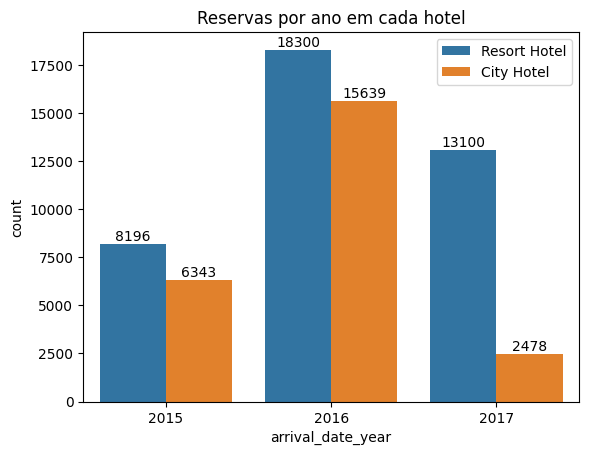

In [19]:
# Visualização de reservas por ano em cada hotel
ax = sns.countplot(data=df , x="arrival_date_year" , hue="hotel" )
plt.legend()
plt.title("Reservas por ano em cada hotel")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [20]:
# Quantidade de cancelamentos
# 0-Reserva ativa, 1-Cancelada
pd.crosstab(df['is_canceled'],df['hotel'])

hotel,City Hotel,Resort Hotel
is_canceled,,
0,5743,28519
1,18717,11077


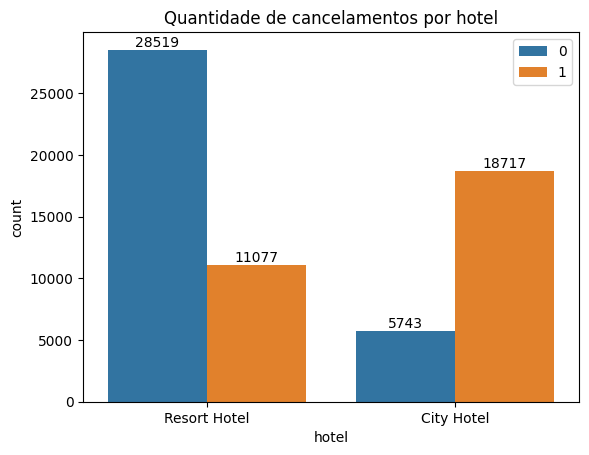

In [21]:
# Quantidade de cancelamentos por hotel
# 0-Reserva ativa, 1-Cancelada
ax = sns.countplot(data=df , x="hotel" , hue="is_canceled" )
plt.legend()
plt.title("Quantidade de cancelamentos por hotel")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [22]:
# Quantidade de reservas por canal de distribuição
df['distribution_channel'].value_counts()

TA/TO        51494
Direct        8884
Corporate     3647
GDS             30
Undefined        1
Name: distribution_channel, dtype: int64

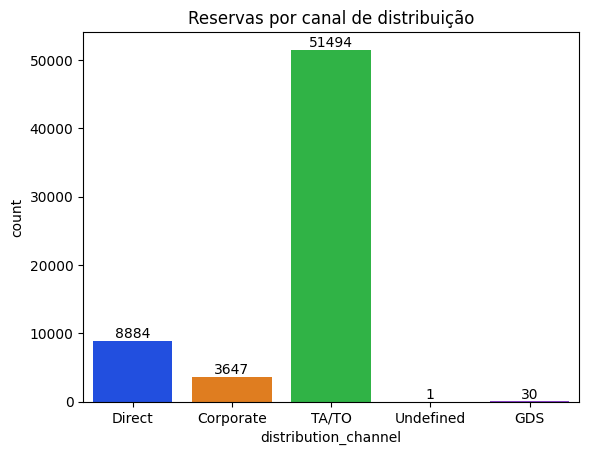

In [23]:
# Visualização das reservas por canal de distribuição
ax = sns.countplot(data=df, x='distribution_channel', palette='bright')
plt.title("Reservas por canal de distribuição")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [30]:
# De qual país vem a maioria dos viajantes?
count_country=df.groupby(by='country')['name'].count()
count_country=count_country.sort_values(ascending=False)
df_count_country=pd.DataFrame(count_country)

print("A maioria dos viajantes vem de:\n ",count_country[:1])

print("\nListe os 5 países com mais passageiros:\n",count_country[:5])

A maioria dos viajantes vem de:
  country
PRT    30343
Name: name, dtype: int64

Liste os 5 países com mais passageiros:
 country
PRT    30343
GBR     7879
ESP     5590
FRA     3385
IRL     2431
Name: name, dtype: int64


#Visualização de dados

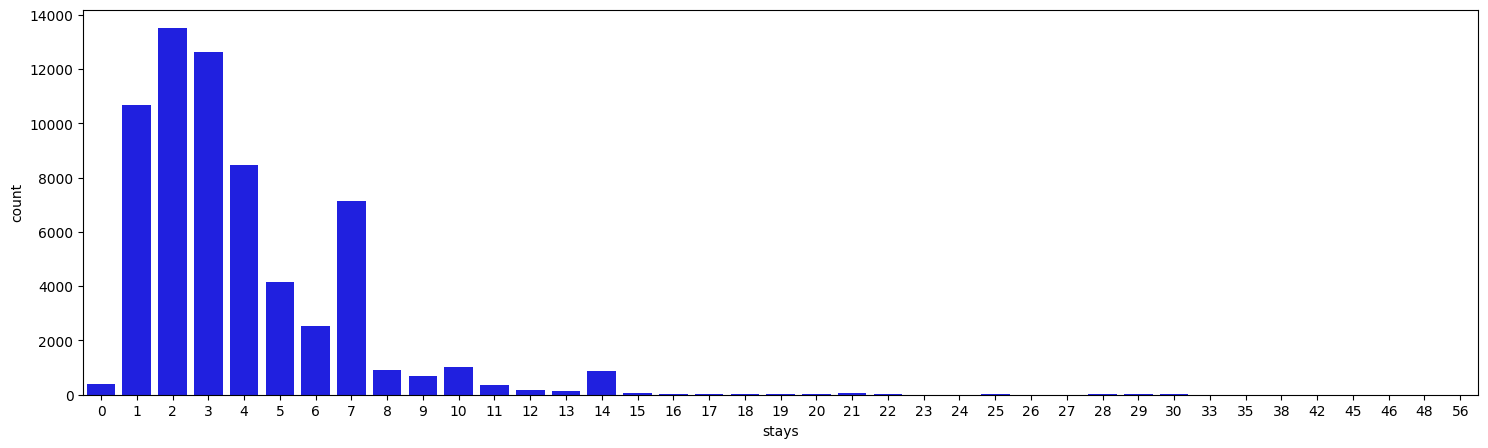

In [25]:
# Visualização de estadias
df['stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(18,5))
sns.countplot(x=df['stays'], color='b')
plt.show()

([<matplotlib.patches.Wedge at 0x7f5703d91ff0>,
 [Text(-1.0934040849073334, -0.12028095072768918, 'Not Canceled'),
  Text(1.0934040736458135, 0.12028105309956662, 'Canceled')],
 [Text(-0.5964022281312727, -0.06560779130601228, '53.5%'),
  Text(0.5964022219886255, 0.06560784714521814, '46.5%')])

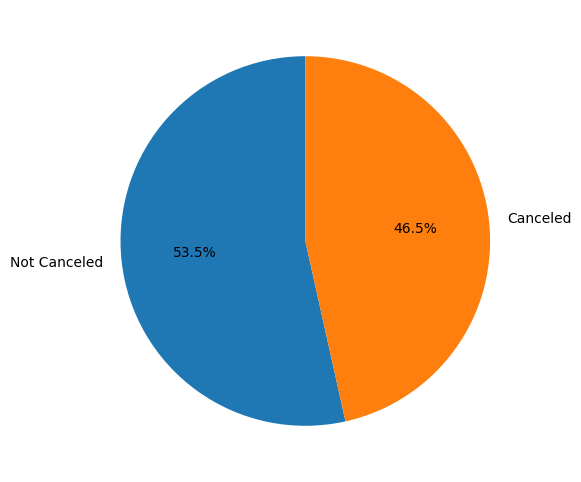

In [26]:
# Porcentagem de cancelamentos
num_can= df['is_canceled'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(num_can, labels=['Not Canceled', 'Canceled'], autopct='%.1f%%', startangle=90)

<Axes: xlabel='hotel', ylabel='is_canceled'>

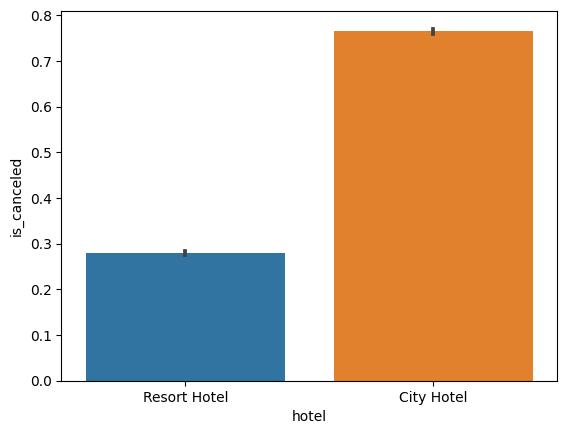

In [31]:
# Qual hotel tem mais cancelamentos?
sns.barplot(data=df,x="hotel",y="is_canceled")

Como podemos ver, o City Hotel possui um número maior de cancelamentos em comparação com o Resort Hotel.

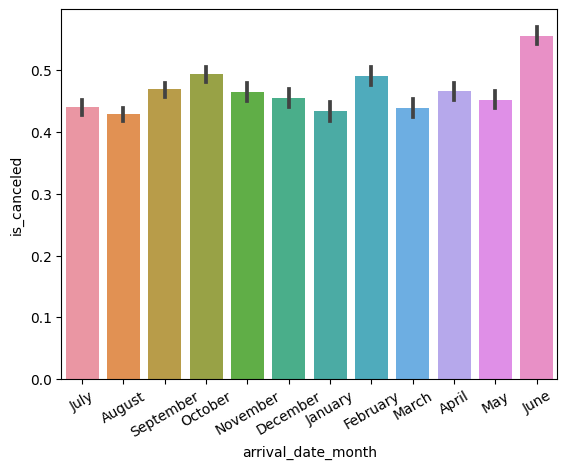

In [28]:
sns.barplot(x='arrival_date_month', y='is_canceled', data=df)
plt.xticks(rotation = 30)
plt.show()

<Axes: xlabel='arrival_date_month', ylabel='count'>

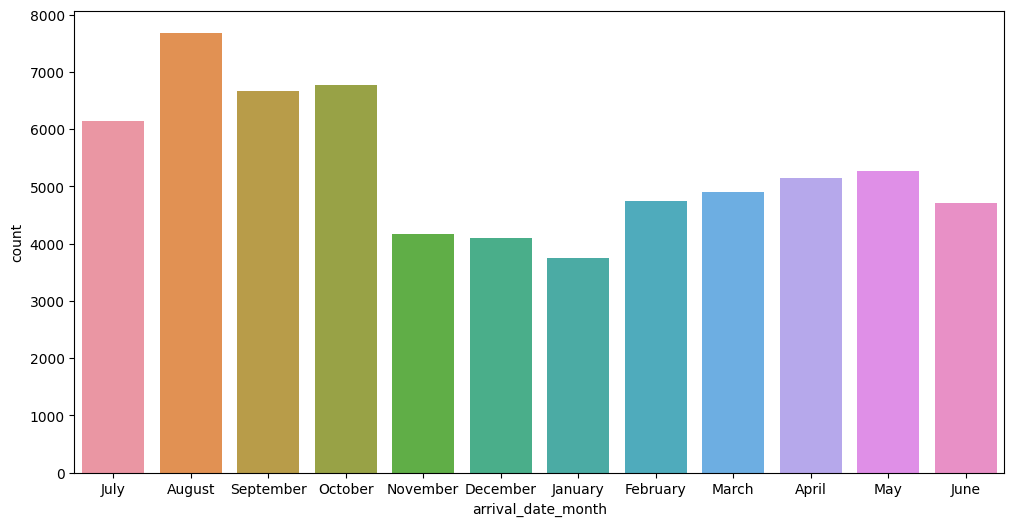

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(data=df ,x="arrival_date_month")